# KAIM Week 8 and 9 Challenges

## **Task 3: Model Explainability with SHAP**

## Import Necessary Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, SimpleRNN, LSTM
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import shap
import tqdm

import warnings

warnings.filterwarnings('ignore')

# Set plot style for better visuals
sns.set(style="whitegrid")

## Load Datasets

In [3]:
# Load the datasets
fraud_data = pd.read_csv('../data/cleaned_data_1.csv')
credit_data = pd.read_csv('../data/cleaned_data_2.csv')

In [4]:
fraud_data.shape, credit_data.shape

((138846, 15), (283726, 31))

In [5]:
fraud_data.columns, credit_data.columns

(Index(['user_id', 'purchase_value', 'source', 'browser', 'sex', 'age',
        'ip_address', 'Class', 'country', 'lower_bound_ip_addres',
        'upper_bound_ip_adress', 'signup_purchase_diff', 'transaction_count',
        'hour_of_day', 'day_of_week'],
       dtype='object'),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'))

## Model Building

In [6]:
# Prepare data for the model (e-commerce)
X1 = fraud_data.drop(columns=['Class'])
X2 = credit_data.drop(columns=['Class'])

y1 = fraud_data['Class']
y2 = credit_data['Class']

print(np.unique(y1, return_counts=True))
print(np.unique(y2, return_counts=True))

(array([0, 1], dtype=int64), array([125849,  12997], dtype=int64))
(array([0, 1], dtype=int64), array([283253,    473], dtype=int64))


In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


### Logistic Regression

In [17]:
log_reg1 = LogisticRegression(C=1, solver='liblinear')
log_reg1.fit(X_train1, y_train1)
y_pred_log_reg1 = log_reg1.predict(X_test1)
print(classification_report(y_test1, y_pred_log_reg1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     25193
           1       0.00      0.00      0.00      2577

    accuracy                           0.91     27770
   macro avg       0.45      0.50      0.48     27770
weighted avg       0.82      0.91      0.86     27770



In [18]:
log_reg2 = LogisticRegression(C=1, solver='liblinear')
log_reg2.fit(X_train2, y_train2)
y_pred_log_reg2 = log_reg2.predict(X_test2)
print(classification_report(y_test2, y_pred_log_reg2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.79      0.47      0.59        90

    accuracy                           1.00     56746
   macro avg       0.90      0.73      0.79     56746
weighted avg       1.00      1.00      1.00     56746



In [15]:
X_train1.shape, X_test1.shape

((111076, 14), (27770, 14))

In [16]:
X_train2.shape, X_test2.shape

((226980, 30), (56746, 30))

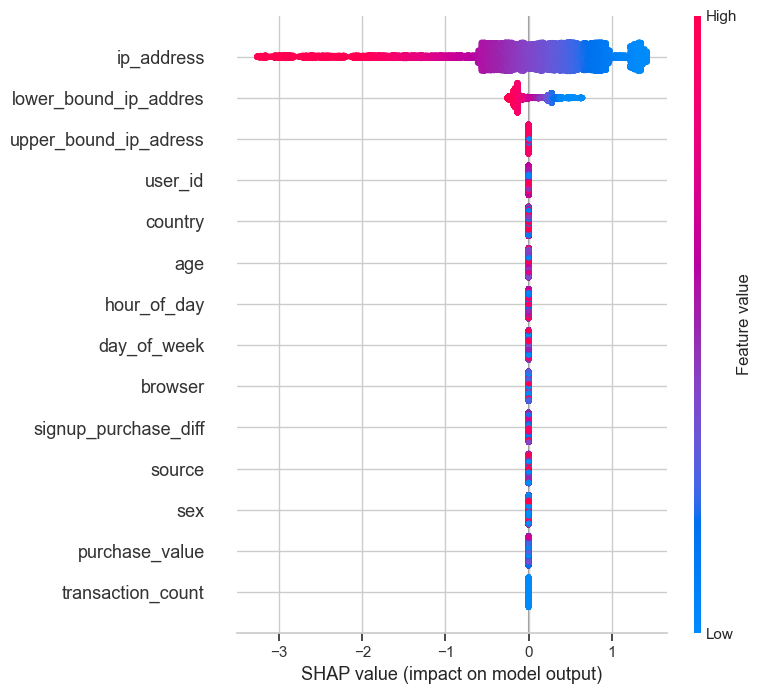

In [21]:
# SHAP explanation for fraud dataset using KernelExplainer
explainer1 = shap.Explainer(log_reg1, X_train1)  # Ensure X_train1 is used as background
shap_values1 = explainer1(X_test1)  # Ensure X_test1 has the same shape as X_train1

# Plot summary plot for fraud data
shap.summary_plot(shap_values1, X_test1, feature_names=X1.columns)

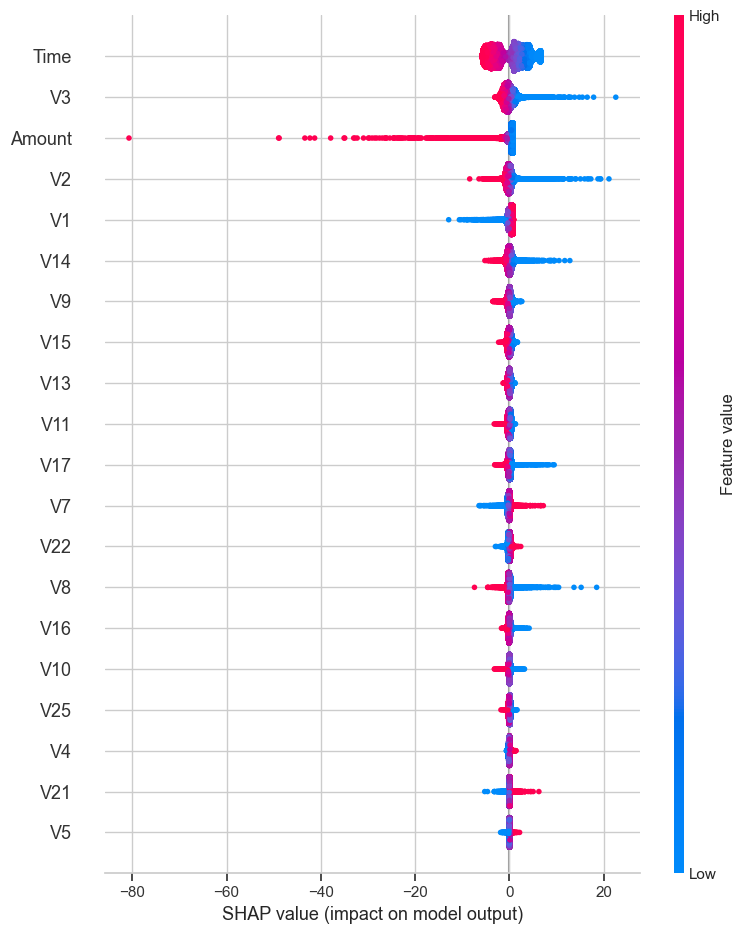

In [22]:
# SHAP explanation for credit dataset
explainer2 = shap.Explainer(log_reg2, X_train2)
shap_values2 = explainer2(X_test2)

# Plot summary plot for credit data
shap.summary_plot(shap_values2, X_test2, feature_names=X2.columns)

### Random Forest

In [23]:
rf_clf1 = RandomForestClassifier(n_estimators=30, max_depth=3)
rf_clf1.fit(X_train1, y_train1)
y_pred_rf1 = rf_clf1.predict(X_test1)
print(classification_report(y_test1, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     25193
           1       1.00      0.54      0.70      2577

    accuracy                           0.96     27770
   macro avg       0.98      0.77      0.84     27770
weighted avg       0.96      0.96      0.95     27770



In [24]:
rf_clf2 = RandomForestClassifier(n_estimators=30, max_depth=3)
rf_clf2.fit(X_train2, y_train2)
y_pred_rf2 = rf_clf2.predict(X_test2)
print(classification_report(y_test2, y_pred_rf2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.57      0.70        90

    accuracy                           1.00     56746
   macro avg       0.96      0.78      0.85     56746
weighted avg       1.00      1.00      1.00     56746



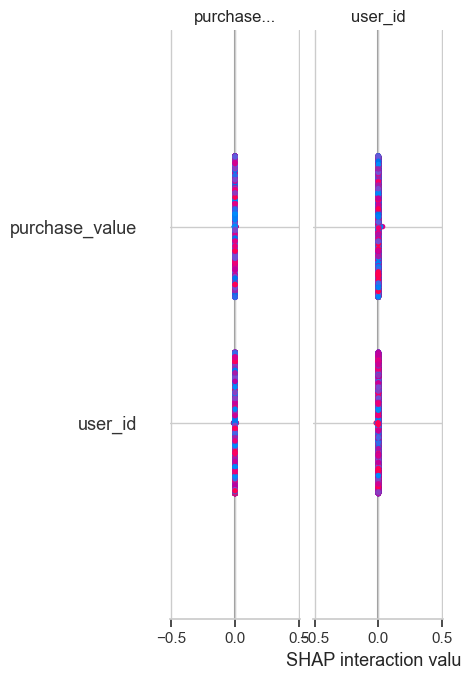

In [25]:
# SHAP explanation for Random Forest model
explainer_rf1 = shap.TreeExplainer(rf_clf1)  # Use TreeExplainer for Random Forest
shap_values_rf1 = explainer_rf1.shap_values(X_test1)  # Get SHAP values

# Plot summary plot for Random Forest model
shap.summary_plot(shap_values_rf1, X_test1, feature_names=X_train1.columns)

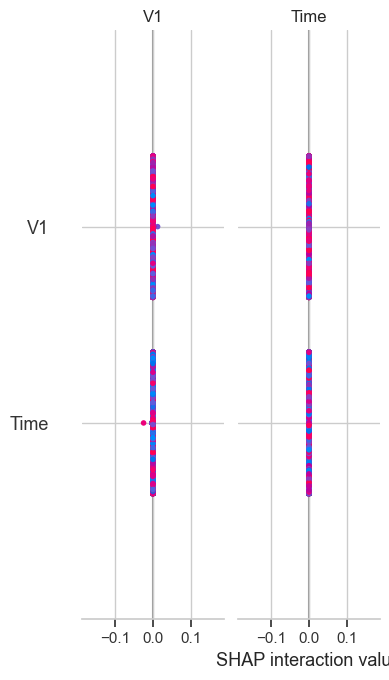

In [26]:
# SHAP explanation for Random Forest model
explainer_rf2 = shap.TreeExplainer(rf_clf2)  # Use TreeExplainer for Random Forest
shap_values_rf2 = explainer_rf2.shap_values(X_test2)  # Get SHAP values

# Plot summary plot for Random Forest model
shap.summary_plot(shap_values_rf2, X_test2, feature_names=X_train2.columns)

### XGBoost 

In [27]:
xgb_clf1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf1.fit(X_train1, y_train1)
y_pred_xgb1 = xgb_clf1.predict(X_test1)
print(classification_report(y_test1, y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     25193
           1       0.94      0.55      0.69      2577

    accuracy                           0.96     27770
   macro avg       0.95      0.77      0.84     27770
weighted avg       0.95      0.96      0.95     27770



In [28]:
xgb_clf2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf2.fit(X_train2, y_train2)
y_pred_xgb2 = xgb_clf2.predict(X_test2)
print(classification_report(y_test2, y_pred_xgb2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



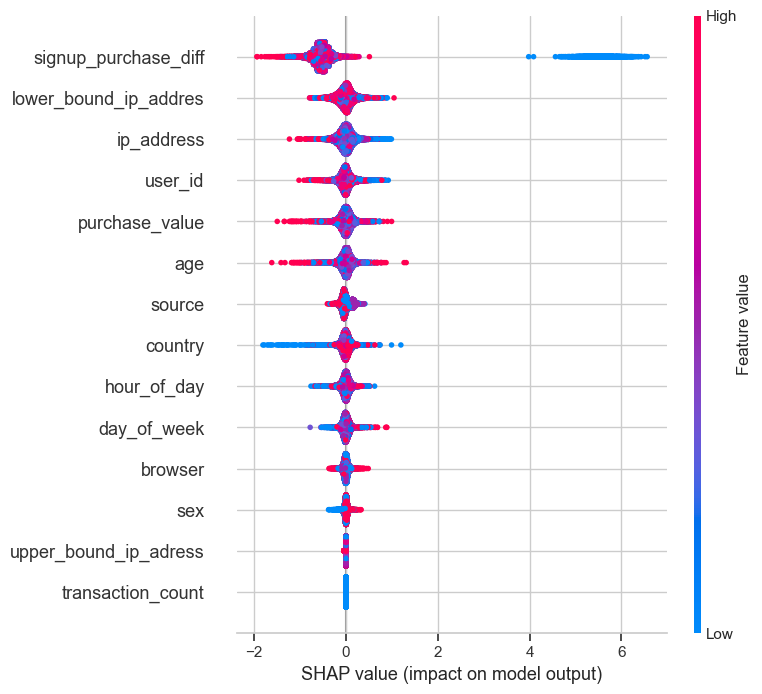

In [29]:
# SHAP explanation for XGBoost model
explainer_xgb1 = shap.Explainer(xgb_clf1)  # Use the SHAP explainer for XGBoost
shap_values_xgb1 = explainer_xgb1(X_test1)  # Get SHAP values for test set

# Plot summary plot for XGBoost model
shap.summary_plot(shap_values_xgb1, X_test1, feature_names=X_train1.columns)

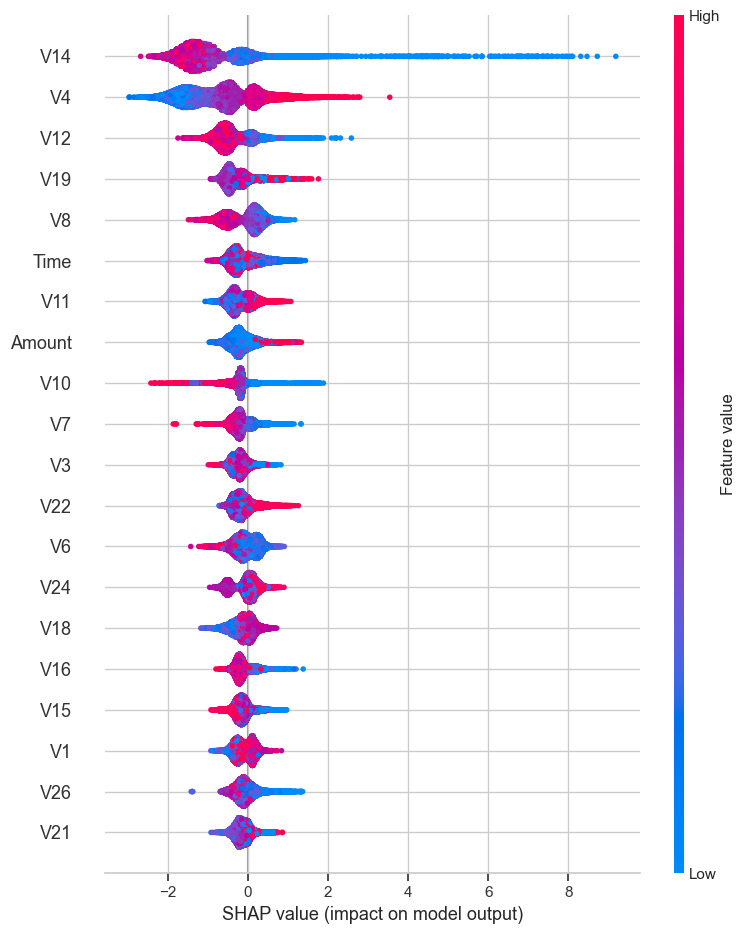

In [31]:
# SHAP explanation for XGBoost model
explainer_xgb2 = shap.Explainer(xgb_clf2)  # Use the SHAP explainer for XGBoost
shap_values_xgb2 = explainer_xgb2(X_test2)  # Get SHAP values for test set

# Plot summary plot for XGBoost model
shap.summary_plot(shap_values_xgb2, X_test2, feature_names=X_train2.columns)

In [32]:

dt_clf1 = DecisionTreeClassifier(max_depth=5)
dt_clf1.fit(X_train1, y_train1)
y_pred_dt1 = dt_clf1.predict(X_test1)
print(classification_report(y_test1, y_pred_dt1))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     25193
           1       1.00      0.55      0.71      2577

    accuracy                           0.96     27770
   macro avg       0.98      0.77      0.84     27770
weighted avg       0.96      0.96      0.95     27770



In [33]:

dt_clf2 = DecisionTreeClassifier(max_depth=5)
dt_clf2.fit(X_train2, y_train2)
y_pred_dt2 = dt_clf2.predict(X_test2)
print(classification_report(y_test2, y_pred_dt2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.74      0.82        90

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



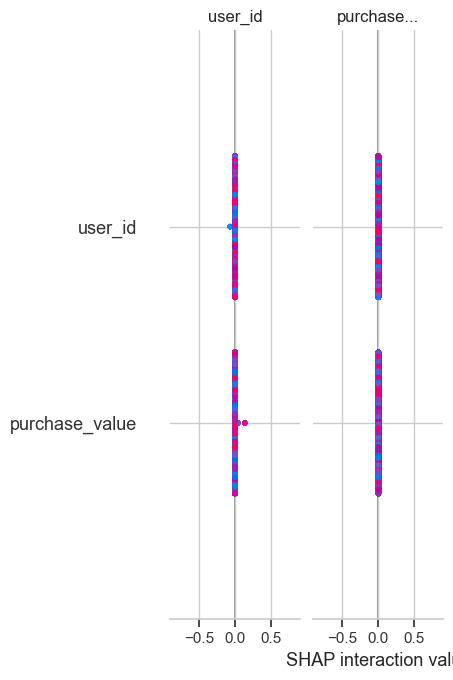

In [34]:
# SHAP explanation for Decision Tree model
explainer_dt1 = shap.TreeExplainer(dt_clf1)  # Use TreeExplainer for Decision Tree
shap_values_dt1 = explainer_dt1.shap_values(X_test1)  # Get SHAP values for test set

# Plot summary plot for Decision Tree model
shap.summary_plot(shap_values_dt1, X_test1, feature_names=X_train1.columns)

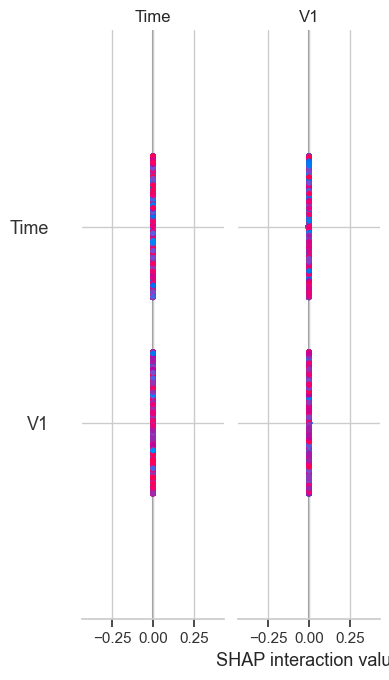

In [35]:
# SHAP explanation for Decision Tree model
explainer_dt2 = shap.TreeExplainer(dt_clf2)  # Use TreeExplainer for Decision Tree
shap_values_dt2 = explainer_dt2.shap_values(X_test2)  # Get SHAP values for test set

# Plot summary plot for Decision Tree model
shap.summary_plot(shap_values_dt2, X_test2, feature_names=X_train2.columns)

#### Class Balancing using SMOTE

In [32]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_res1, y_train_res1 = smt.fit_resample(X_train1, y_train1)
X_train_res2, y_train_res2 = smt.fit_resample(X_train2, y_train2)

print(np.unique(y_train_res1, return_counts=True))
print(np.unique(y_train_res2, return_counts=True))

(array([0, 1]), array([88947, 88947]))
(array([0, 1]), array([225994, 225994]))


In [12]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     25193
           1       0.81      0.56      0.66      2577

    accuracy                           0.95     27770
   macro avg       0.88      0.77      0.82     27770
weighted avg       0.94      0.95      0.94     27770



## Experiments

In [50]:
datasets = {
    "fraud_data": (X_train1, y_train1, X_test1, y_test1),
    "credit_data": (X_train2, y_train2, X_test2, y_test2),
}

In [51]:
'''
models = [
    (
        "Logistic Regression", 
        LogisticRegression(C=1, solver='liblinear'), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Random Forest", 
        RandomForestClassifier(n_estimators=30, max_depth=3), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "XGBClassifier",
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "XGBClassifier With SMOTE",
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
        (X_train_res1, y_train_res1),
        (X_test1, y_test1)
    )
]
'''

'\nmodels = [\n    (\n        "Logistic Regression", \n        LogisticRegression(C=1, solver=\'liblinear\'), \n        (X_train, y_train),\n        (X_test, y_test)\n    ),\n    (\n        "Random Forest", \n        RandomForestClassifier(n_estimators=30, max_depth=3), \n        (X_train, y_train),\n        (X_test, y_test)\n    ),\n    (\n        "XGBClassifier",\n        XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\'), \n        (X_train, y_train),\n        (X_test, y_test)\n    ),\n    (\n        "XGBClassifier With SMOTE",\n        XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\'), \n        (X_train_res1, y_train_res1),\n        (X_test1, y_test1)\n    )\n]\n'

In [53]:
# Defining each model
models = [
    # Logistic Regression
    (
        "Logistic Regression", 
        LogisticRegression(C=1, solver='liblinear')
    ),
    
    # Random Forest
    (
        "Random Forest", 
        RandomForestClassifier(n_estimators=30, max_depth=3)
    ),
    
    # XGBoost
    (
        "XGBClassifier", 
        XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    ),

    # Decision Tree
    (
        "Decision Tree", 
        DecisionTreeClassifier(max_depth=5)
    ),
    
    # Multi-Layer Perceptron (MLP)
    (
        "MLP Classifier", 
        MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    ),
    
    # Convolutional Neural Network (CNN)
    (
        "CNN", 
        Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(1 , activation='sigmoid')
        ])
    ),
    
    # Recurrent Neural Network (RNN)
    (
        "RNN", 
        Sequential([
            SimpleRNN(50, input_shape=(100, 1), activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    ),
    
    # Long Short-Term Memory (LSTM)
    (
        "LSTM", 
        Sequential([
            LSTM(50, input_shape=(100, 1), activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    )
]


ValueError: object __array__ method not producing an array

In [54]:
models = [
    (
        "Logistic Regression", 
        LogisticRegression(C=1, solver='liblinear')
    ),
    (
        "Random Forest", 
        RandomForestClassifier(n_estimators=30, max_depth=3)
    ),
    (
        "XGBClassifier",
        XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    )
]

In [16]:
# Initialize MLflow
mlflow.set_experiment("Fraud Detection Models - Single Dataset")
mlflow.set_tracking_uri("http://localhost:5000")

reports = []

for model_name, model, train_set, test_set in models:
    X_train = train_set[0]
    y_train = train_set[1]
    X_test = test_set[0]
    y_test = test_set[1]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    reports.append(report)

for i, element in enumerate(models):
    model_name = element[0]
    model = element[1]
    report = reports[i]
    
    with mlflow.start_run(run_name=model_name):        
        mlflow.log_param("model", model_name)
        mlflow.log_metric('accuracy', report['accuracy'])
        mlflow.log_metric('recall_class_1', report['1']['recall'])
        mlflow.log_metric('recall_class_0', report['0']['recall'])
        mlflow.log_metric('f1_score_macro', report['macro avg']['f1-score'])        
        
        if "XGB" in model_name:
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")  

2024/10/20 13:43:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 13:43:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: http://localhost:5000/#/experiments/935012191474515353/runs/66416527b5ad44a0be0886ed9e43b658.
2024/10/20 13:43:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/935012191474515353.
2024/10/20 13:43:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 13:43:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: http://localhost:5000/#/experiments/935012191474515353/runs/3c3923af256d4ca4947318c3e70a6fbf.
2024/10/20 13:43:21 INFO mlflow.tracking._tracking_service.client: 🧪 View exp

In [55]:
# Initialize MLflow
mlflow.set_experiment("Fraud Detection Models - 2 Datasets")
mlflow.set_tracking_uri("http://localhost:5000")

# Iterate through datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    reports = []

    # Train each model on the current dataset
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        reports.append(report)

    # Log each model's performance metrics to MLflow
    for i, (model_name, model) in enumerate(models):
        report = reports[i]

        with mlflow.start_run(run_name=f"{model_name}_{dataset_name}"):
            mlflow.log_param("model", model_name)
            mlflow.log_param("dataset", dataset_name)
            mlflow.log_metric('accuracy', report['accuracy'])
            mlflow.log_metric('recall_class_1', report['1']['recall'])
            mlflow.log_metric('recall_class_0', report['0']['recall'])
            mlflow.log_metric('f1_score_macro', report['macro avg']['f1-score'])

            # Log the model using the appropriate MLflow method
            if "XGBoost" in model_name:
                mlflow.xgboost.log_model(model, "model")
            else:
                mlflow.sklearn.log_model(model, "model")


2024/10/20 20:16:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 20:16:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression_fraud_data at: http://localhost:5000/#/experiments/478268722598582565/runs/8273f777699647a39535d873391b9d13.
2024/10/20 20:16:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/478268722598582565.
2024/10/20 20:16:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/20 20:16:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest_fraud_data at: http://localhost:5000/#/experiments/478268722598582565/runs/65913aaab7ce49948b90f6752b771312.
2024/10/20 20:16:24 INFO mlflow.tracking._tracking_serv

In [ ]:

# Load the datasets
fraud_data = pd.read_csv('../data/cleaned_data_1.csv')
credit_data = pd.read_csv('../data/cleaned_data_2.csv')

# Prepare data for the model (e-commerce)
X1 = fraud_data.drop(columns=['Class'])
X2 = credit_data.drop(columns=['Class'])

y1 = fraud_data['Class']
y2 = credit_data['Class']

print(np.unique(y1, return_counts=True))
print(np.unique(y2, return_counts=True))

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


# Datasets
datasets = {
    "fraud_data": (X_train1, y_train1, X_test1, y_test1),
    "credit_data": (X_train2, y_train2, X_test2, y_test2),
}


# Defining each model
models = [
    # Logistic Regression
    (
        "Logistic Regression", 
        LogisticRegression(C=1, solver='liblinear')
    ),
    
    # Random Forest
    (
        "Random Forest", 
        RandomForestClassifier(n_estimators=30, max_depth=3)
    ),
    
    # XGBoost
    (
        "XGBClassifier", 
        XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    ),

    # Decision Tree
    (
        "Decision Tree", 
        DecisionTreeClassifier(max_depth=5)
    ),
    
    # Multi-Layer Perceptron (MLP)
    (
        "MLP Classifier", 
        MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
    ),
    
    # Convolutional Neural Network (CNN)
    (
        "CNN", 
        Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(1 , activation='sigmoid')
        ])
    ),
    
    # Recurrent Neural Network (RNN)
    (
        "RNN", 
        Sequential([
            SimpleRNN(50, input_shape=(100, 1), activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    ),
    
    # Long Short-Term Memory (LSTM)
    (
        "LSTM", 
        Sequential([
            LSTM(50, input_shape=(100, 1), activation='relu'),
            Dense(1, activation='sigmoid')
        ])
    )
]



# Initialize MLflow
mlflow.set_experiment("Fraud Detection Models - 2 Datasets")
mlflow.set_tracking_uri("http://localhost:5000")

# Iterate through datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    reports = []

    # Train each model on the current dataset
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        reports.append(report)

    # Log each model's performance metrics to MLflow
    for i, (model_name, model) in enumerate(models):
        report = reports[i]

        with mlflow.start_run(run_name=f"{model_name}_{dataset_name}"):
            mlflow.log_param("model", model_name)
            mlflow.log_param("dataset", dataset_name)
            mlflow.log_metric('accuracy', report['accuracy'])
            mlflow.log_metric('recall_class_1', report['1']['recall'])
            mlflow.log_metric('recall_class_0', report['0']['recall'])
            mlflow.log_metric('f1_score_macro', report['macro avg']['f1-score'])

            # Log the model using the appropriate MLflow method
            if "XGBoost" in model_name:
                mlflow.xgboost.log_model(model, "model")
            else:
                mlflow.sklearn.log_model(model, "model")
